In [1]:
from IPython.display import Image

# 교차검증
- 교차검증의 기본 절차:
1. 교차 검증 1단계에서는 데이터를 학습용과 테스트용으로 나눔
2. 모델의 테스트 성능을 기록
3. 교차검증의 매 단계마다 다른 파티션으로 위의 작업을 수행
4. 모델의 최종 성능은 매 단계의 테스트 성능을 평균 계산

- 교차 검증은 모델의 변동성을 줄여주며 오버피팅과 같은 문제를 막아줌
- 교차 검증의 장점: 모든 데이터를 학습용 데이터로 사용 가능

## k 폴드 교차 검증:
- 데이터를 무작위로 k개의 동일한 크기인 폴드로 나눔. (보통 k값으로 3, 5, 10 을 많이 사용)
- 각 시행 단계에서 특정 폴드를 테스트용으로, 나머지는 학습용으로 사용
- 각 폴드를 테스트 세트로 한 번씩 사용하고 이 과정을 k번 반복 시행함
- 최종적으로 모델 성능의 평균을 계산

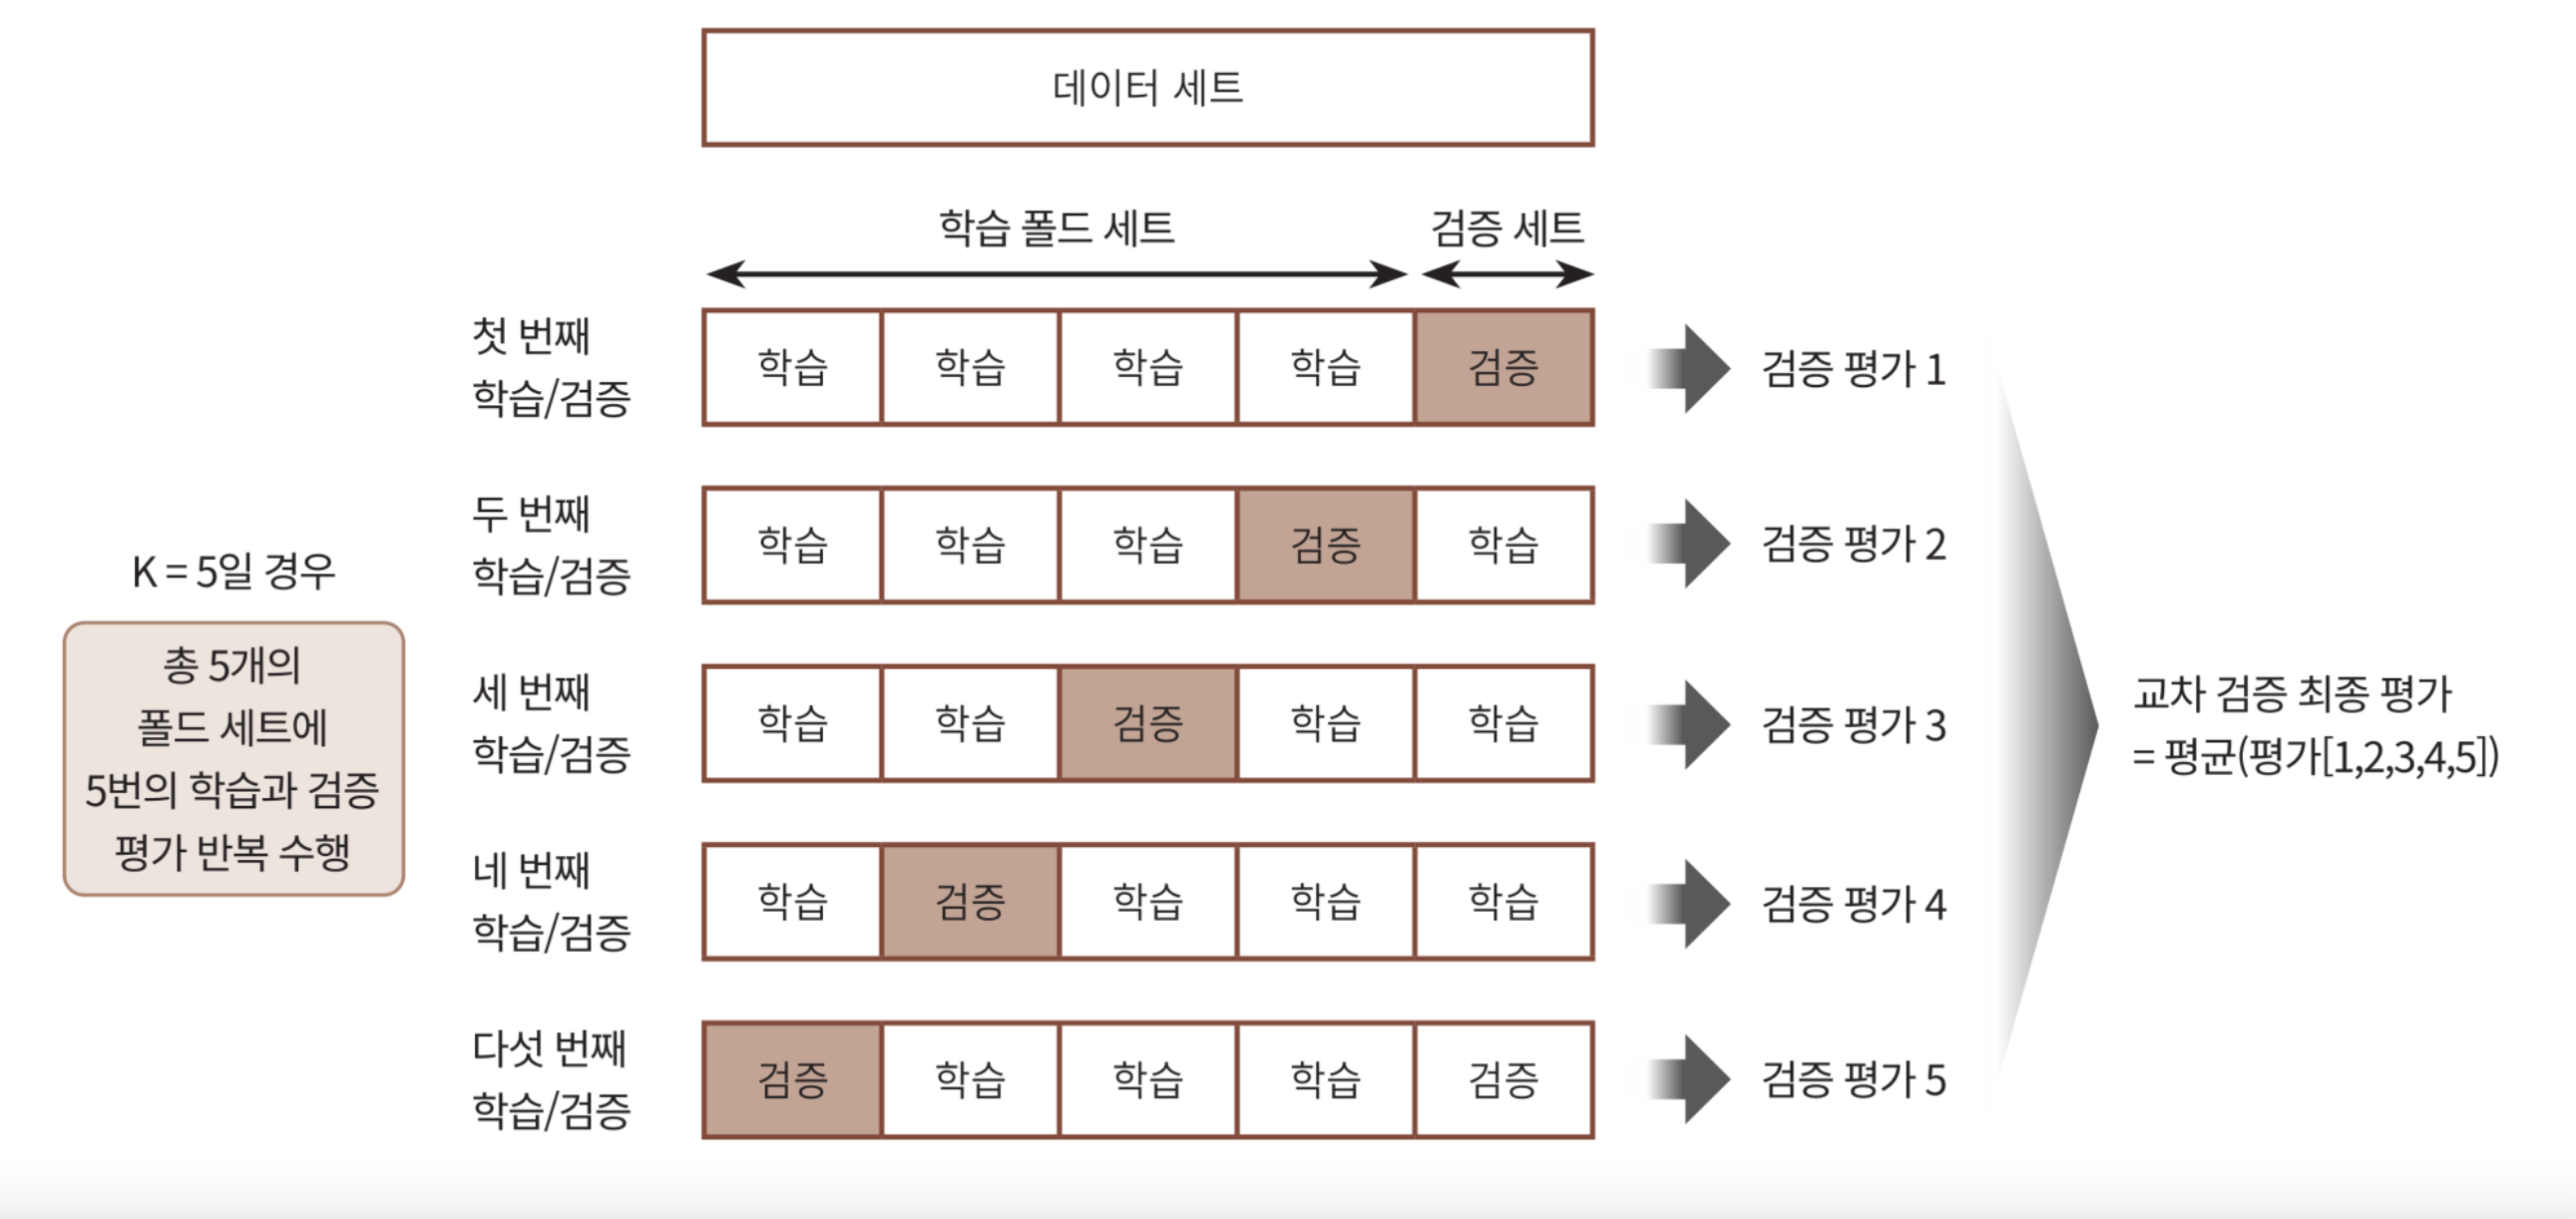

In [2]:
Image('./교차검증.png')

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [6]:
from sklearn.model_selection import cross_val_score     # cross_val_score교차검증 함수
cross_val_score(model, X, y, cv = 5)                    # cv가 k값

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

## 단일 관측치 제거 방식 (LOOCV)
- Leave-one-out cross validation
- 매 시행 단계에서 테스트 샘플을 고정하는 방식
- 테스트를 n개의 서브세트로 분할하고, n개 중 1개를 테스트용으로 두고 n-1개로 학습을 수행
- 데이터 크기가 n이면 n번의 교차 검증을 수행

In [7]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores    # 1은 성공, 0은 실패

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
scores.mean()  # scores의 평균을 내면 성능 측정 가능

0.96